<a href="https://colab.research.google.com/github/GonzaBot/Modelo-ML-prediccion-de-precio-de-casas-/blob/main/Modelo_prediccion_de_precios_de_casas(Trabajo_base_de_datos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este conjunto de datos contiene los precios de venta de casas para el condado de King, que incluye Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015.


importamos liberias

In [ ]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Importamos el dataset


In [ ]:
# leemos archivo csv
file_name='/content/kc_house_data.csv'
#transformamos en un dataset de pandas
df=pd.read_csv(file_name)

usamos el metedo head() para visualizar las columnas de la cabeza del dataset(las primeras 5 columnas)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


ETAPA DE LIMPIEZA DE DATOS

nos fijamos en los tipos de datos para ver cuales tenemos que arreglar o parsear

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

usamos el metodo .describe() para describir las estadisticas de este dataframe

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


verificamos cuantos son los valores nulos(NaN) que contiene el dataset en las columnas  bedrooms y  bathrooms.  

In [ ]:
print("cantidad de NaN en columna bedrooms :", df['bedrooms'].isnull().sum())
print("cantidad de NaN en columna  bathrooms :", df['bathrooms'].isnull().sum())

cantidad de NaN en columna bedrooms : 0
cantidad de NaN en columna  bathrooms : 0


SECCION DE EXPLORACION DE DATOS

Utiliza el método value_counts para contar el número de casas que tienen determinado numero de pisos y luego usa el método .to_frame() para convertirlo en un dataset para visualizarlo.

In [ ]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Utiliza la función regplot de la biblioteca Seaborn para determinar si la característica sqft_above está correlacionada de manera negativa o positiva con el precio.

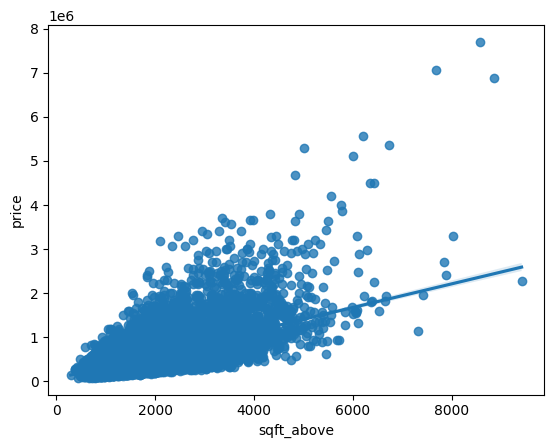

In [ ]:

# Llamamos a la función regplot, especificando las variables x e y que se utilizarán para crear el gráfico
sns.regplot(x="sqft_above", y="price", data=df)

# Mostramos el gráfico
plt.show()

Buscamos la columna del dataset que tiene la correlacion mas aolta con el precio

In [ ]:
df.corr()['price'].sort_values()

<ipython-input-10-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

**R²**:  
El coeficiente de determinación, comúnmente abreviado como R^2 (pronunciado "R al cuadrado"), es una métrica estadística que se utiliza en modelos de regresión en el campo del machine learning y la estadística para evaluar qué tan bien un modelo se ajusta a los datos observados. R^2 proporciona una medida de la bondad de ajuste del modelo, es decir, cuánta variación en la variable dependiente (la que estás tratando de predecir) puede explicar el modelo.

Ajustamos un modelo de regresión lineal para predecir el 'precio' utilizando la característica 'long' y luego calcula el R^2.:

In [ ]:
# Crea un objeto X que contiene la característica longitud
X = df[['long']]

# Crea un objeto Y que contiene la variable de destino, que es el precio
Y = df['price']

# Crea un objeto lm que es un modelo de regresión lineal
lm = LinearRegression()

# Ajusta el modelo a los datos de entrenamiento
lm.fit(X, Y)

# Calcula el R^2 del modelo
R2 = lm.score(X, Y)

# Imprime el R^2
print(R2)

0.00046769430149007363




R^2 = 0 significa que el modelo no explica nada de la variación en los datos, y esencialmente, el modelo no se ajusta a los datos en absoluto.
R^2 = 1 significa que el modelo explica perfectamente la variación en los datos y se ajusta a los datos de manera ideal.









Ajustamos un modelo de regresión lineal para predecir el 'precio' utilizando la característica 'sqft_living' y luego calcula el R^2.

In [ ]:
# Crea un objeto X que contiene la característica longitud
sqft_living = df[['sqft_living']]

# Crea un objeto Y que contiene la variable de destino, que es el precio
Y = df['price']

# Crea un objeto lm que es un modelo de regresión lineal
lm = LinearRegression()

# Ajusta el modelo a los datos de entrenamiento
lm.fit(X, Y)

# Calcula el R^2 del modelo
R2 = lm.score(X, Y)

# Imprime el R^2
print(R2)

0.00046769430149007363


Ajusta un modelo de regresión lineal para predecir el 'precio' utilizando la lista de características:

In [ ]:
caracteristicas =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

calculo el R^2

In [ ]:
precio = df['price']
x = df[caracteristicas]
lm = LinearRegression()
lm.fit(x,precio)
lm.score(x, precio)

0.6577225505542041

-Crea una lista de tuplas, donde el primer elemento de cada tupla contenga el nombre del estimador

'scale'

'polynomial'

'model'

-El segundo elemento contiene la funcion que construye el modelo

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Un "pipeline" en el contexto del machine learning es una secuencia ordenada de pasos que se utilizan para procesar y analizar datos. En particular, se refiere a una serie de transformaciones de datos y modelos aplicados en un orden específico para realizar tareas como preprocesamiento de datos, entrenamiento de modelos y predicciones de forma más eficiente y organizada.



Creamos un pipeline para pipeline para predecir el 'precio' y y calcula el coeficiente de determinación (R^2).

In [ ]:
# Se crea un objeto pipeline que recibe la lista de pasos como parametro
pipe=Pipeline(Input)
#se entrena el modelo con las caracteristicas en relacion al precio
pipe.fit(df[caracteristicas],df['price'])
# Se obtiene el R^2 de este modelo
pipe.score(df[caracteristicas],df['price'])

0.7513483302081219

In [ ]:
EVALUZACION Y REFINACION DE NUESTRO MODELO

import

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

dividimos el dataset en test y entrenamiento para intentar mejorar la calidad del modelo

In [ ]:
X = df[caracteristicas]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("numero de registros para test:", x_test.shape[0])
print("numero de registros para entrenamiento:",x_train.shape[0])

numero de registros para test: 3242
numero de registros para entrenamiento: 18371


Crea y ajusta un objeto de regresión Ridge utilizando los datos de entrenamiento, establece el parámetro de regularización en 0.1 y calcula el coeficiente de determinación (R^2) utilizando los datos de prueba

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6480374087702244

Realiza una transformación polinómica de segundo orden en los datos de entrenamiento y los datos de prueba. Crea y ajusta un objeto de regresión Ridge utilizando los datos de entrenamiento, establece el parámetro de regularización en 0.1 y calcula el coeficiente de determinación (R^2) utilizando los datos de prueba proporcionados. Toma una captura de pantalla de tu código y el valor de R^2.

In [ ]:
polylm = PolynomialFeatures(degree=2)

x_train_polylm=polylm.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_polylm, y_train)

print('R^2 de regresión Ridge con datos de entrenamiento')
score = RidgeModel.score(x_train_polylm, y_train)
print(score)

R^2 de regresión Ridge con datos de entrenamiento
0.7418393310996081


In [ ]:
x_test_polylm=polylm.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_test_polylm, y_test)
RidgeModel.score(x_test_polylm, y_test)

print('R^2 de regresión Ridge con datos de test')
score = RidgeModel.score(x_train_polylm, y_train)
print(score)

R^2 de regresión Ridge con datos de test
0.6677147988867007
